In [1]:
from ActiveTestingRegressionMV import *
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
warnings.filterwarnings('ignore')

### Concrete Data

In [2]:
data = pd.read_csv("DataConc.csv")

data.head()

X = data.iloc[:,:-1].to_numpy()         # Features - All columns but last
y = data.iloc[:,-1].to_numpy()          # Target - Last Column

X.shape, y.shape

((1030, 8), (1030,))

In [3]:
X = StandardScaler().fit_transform(X)

# D_train and D_test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=1) # 15

In [4]:
# train 
reg_learner = Pipeline([
            ("polynomial_features", PolynomialFeatures(degree=5, include_bias=False)),
            ("std", StandardScaler()),
            ("linear_regression", Ridge())])


reg_learner.fit(X_train, y_train)

y_pred = reg_learner.predict(X_test)

full_loss = np.sqrt(quadratic_loss(y_test, y_pred).mean())

print(full_loss, X_test.shape)

10.108405822165032 (515, 8)


Trial 30 Complete [00h 00m 02s]
mean_squared_error: 71.97901153564453

Best mean_squared_error So Far: 47.574337005615234
Total elapsed time: 00h 00m 54s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 dense_9 (Dense)             (None, 480)               61920     
                                                                 
 dense_10 (Dense)            (None, 160)               76960     
                                                                 
 dense_11 (Dense)            (None, 224)               36064     
                                                                 
 dense_12 (Dense)            (None, 416)               93600     
                                                                 
 dense_13 (Dense)            (No

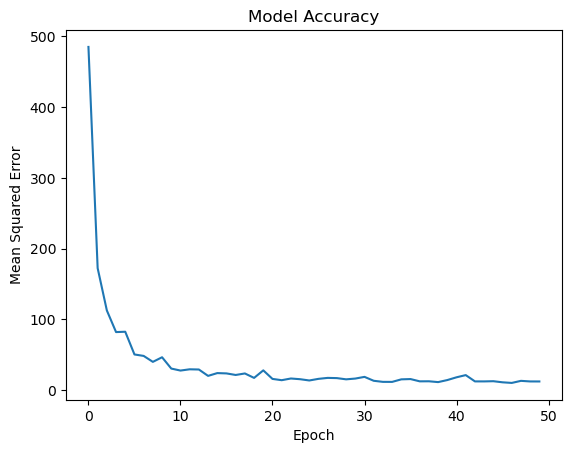

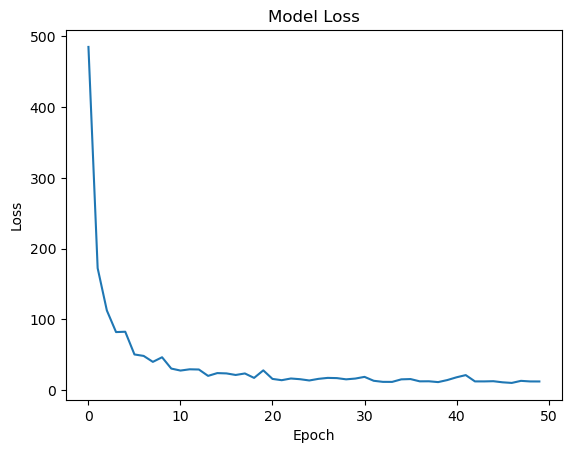

In [5]:
reg_evaluator = create_model(X_train, y_train, model_type = "boot", min_layers = 2, max_layers = 6, min_value = 32, max_value = 512, step = 32)

plot_model(X_train, y_train, reg_evaluator)

### Bootstrap Surrogate Sampling

---51---
17/17 [==============================] - 0s 1ms/step
---103---
17/17 [==============================] - 0s 1ms/step
---154---
17/17 [==============================] - 0s 2ms/step
---206---
17/17 [==============================] - 0s 1000us/step
---257---
17/17 [==============================] - 0s 2ms/step


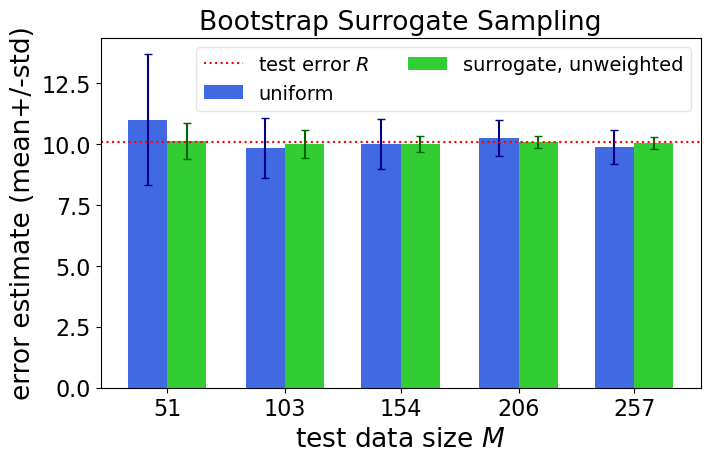

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
51,11.001560,2.687665,10.141926,0.730308
103,9.849882,1.240063,9.994044,0.578084
154,10.015603,1.016512,10.008179,0.348097
206,10.258007,0.727717,10.091924,0.256937
257,9.900949,0.699164,10.056567,0.245291


Full Test R Value: 10.108405822165032


In [6]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "boot", n_reps = 30, num_exp = 30, plot_title = "Bootstrap")

---51---
17/17 [==============================] - 0s 1ms/step
---103---
17/17 [==============================] - 0s 1ms/step
---154---
17/17 [==============================] - 0s 1ms/step
---206---
17/17 [==============================] - 0s 1ms/step
---257---
17/17 [==============================] - 0s 1ms/step


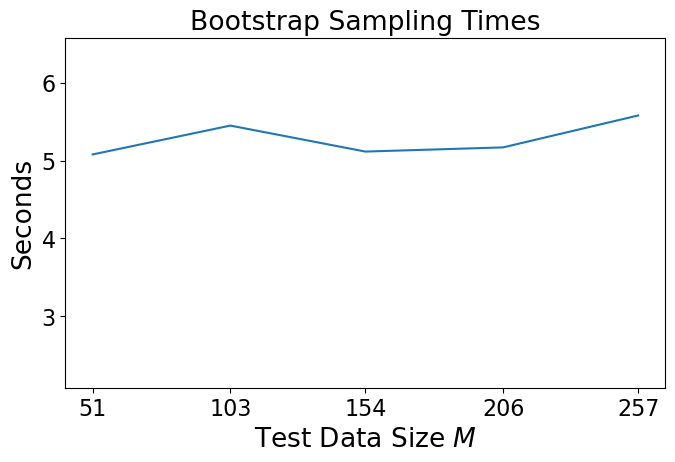

In [7]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "boot", plot_title = "Bootstrap")

### Dropout Regression Model

Trial 30 Complete [00h 00m 03s]
mean_squared_error: 288.62615966796875

Best mean_squared_error So Far: 181.84677124023438
Total elapsed time: 00h 01m 09s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               1152      
                                                                 
 lambda_7 (Lambda)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               66048     
                                                                 
 lambda_8 (Lambda)           (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 352)               180576    
                                                                 
 lambda_9 (Lambda)           (N

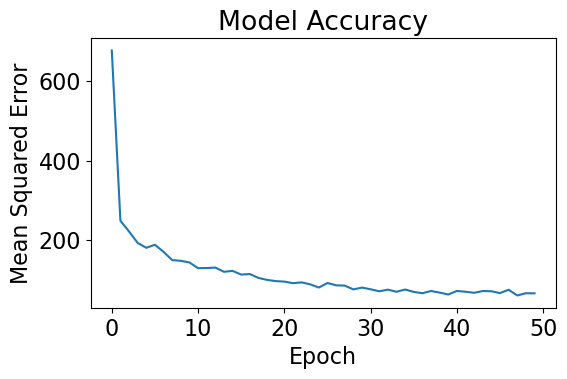

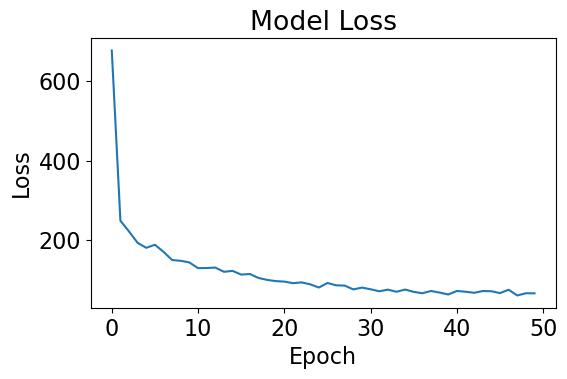

In [8]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "drop", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Dropout Surrogate Sampling

---51---
17/17 [==============================] - 0s 3ms/step
---103---
17/17 [==============================] - 0s 1ms/step
---154---
17/17 [==============================] - 0s 1ms/step
---206---
17/17 [==============================] - 0s 2ms/step
---257---
17/17 [==============================] - 0s 1ms/step


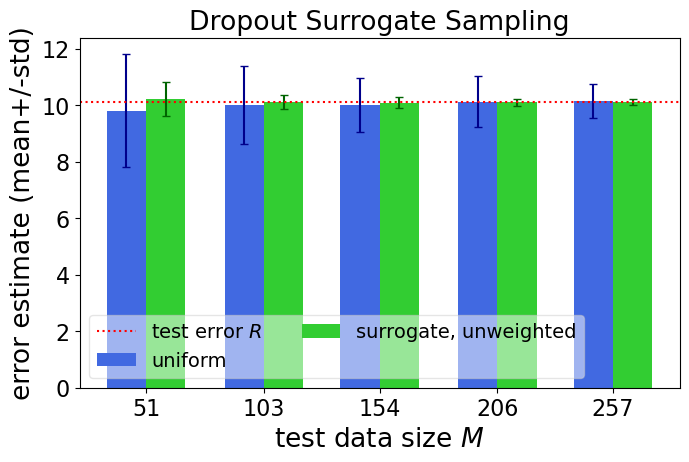

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
51,9.802404,1.995951,10.231109,0.598198
103,10.008555,1.394975,10.112829,0.260526
154,10.002117,0.956797,10.091911,0.198310
206,10.121821,0.896907,10.096312,0.128803
257,10.151416,0.589095,10.103799,0.100320


Full Test R Value: 10.108405822165032


In [9]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, model_type = "drop", n_reps = 30, num_exp = 30, plot_title = "Dropout")

In [ ]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "drop", plot_title = "Dropout")

### Probabilistic Layer Regression Model

Trial 30 Complete [00h 00m 04s]
mean_squared_error: 53.27741241455078

Best mean_squared_error So Far: 43.46810531616211
Total elapsed time: 00h 01m 27s
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 192)               1728      
                                                                 
 dense_13 (Dense)            (None, 96)                18528     
                                                                 
 dense_14 (Dense)            (None, 160)               15520     
                                                                 
 dense_15 (Dense)            (None, 416)               66976     
                                                                 
 dense_16 (Dense)            (None, 288)               120096    
                                                                 
 dense_17 (Dense)            (Non

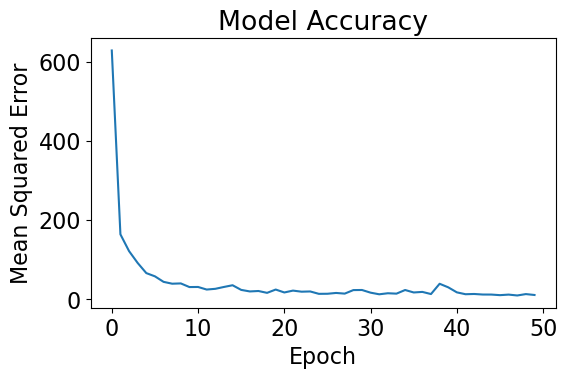

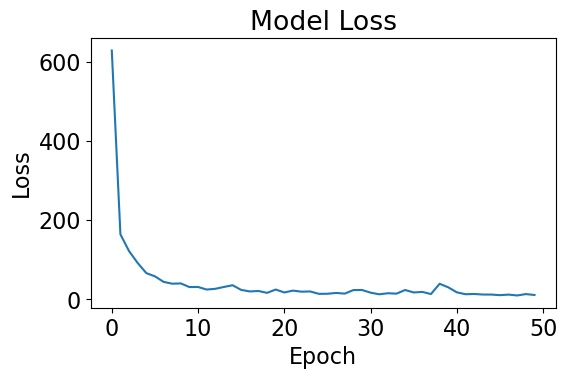

In [16]:
# Tune for data using hyperband and create model
reg_evaluator = create_model(X_train, y_train, model_type = "prob", min_layers = 2, max_layers = 10, min_value = 32, max_value = 512, step = 32)

# View Model Architecture and Plot History of MSE and Loss over Epochs
plot_model(X_train, y_train, reg_evaluator)

### Probabilistic Layer Surrogate Sampling

---51---
17/17 [==============================] - 0s 2ms/step
---103---
17/17 [==============================] - 0s 1ms/step
---154---
17/17 [==============================] - 0s 1ms/step
---206---
17/17 [==============================] - 0s 2ms/step
---257---
17/17 [==============================] - 0s 2ms/step


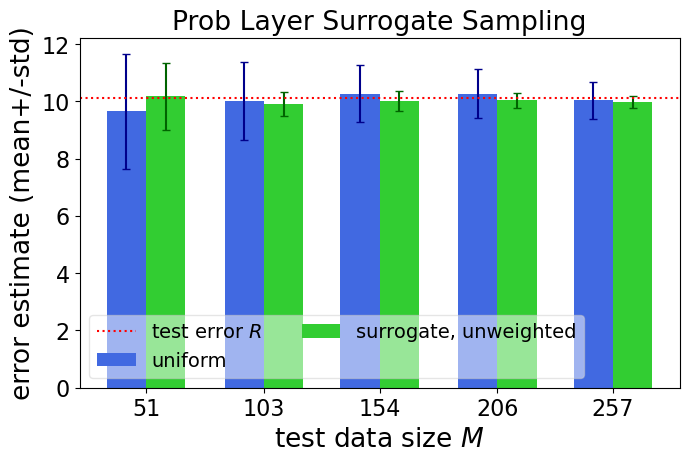

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
51,9.644075,1.992954,10.176384,1.176888
103,10.024842,1.360915,9.896768,0.417333
154,10.255253,0.995176,10.010273,0.350265
206,10.264287,0.863980,10.041641,0.262553
257,10.029819,0.638266,9.975314,0.196357


Full Test R Value: 10.108405822165032


In [17]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type = "prob", num_exp = 30, plot_title = "Prob Layer")

---51---
17/17 [==============================] - 0s 1ms/step
---103---
17/17 [==============================] - 0s 977us/step
---154---
17/17 [==============================] - 0s 980us/step
---206---
17/17 [==============================] - 0s 1ms/step
---257---
17/17 [==============================] - 0s 1ms/step


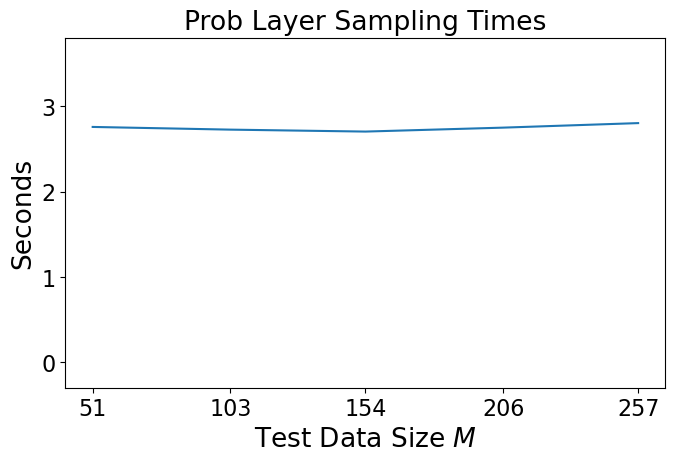

In [12]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "prob", plot_title = "Prob Layer")

### Variational Inference Regression Model

In [13]:
reg_evaluator = build_vi(X_train, y_train)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_variational (DenseVa  (None, 2)                 54        
 riational)                                                      
                                                                 
 dense_variational_1 (Dense  (None, 2)                 18        
 Variational)                                                    
                                                                 
 distribution_lambda (Distr  ((None, 1),               0         
 ibutionLambda)               (None, 1))                         
                                                                 
Total params: 72 (288.00 Byte)
Trainable params: 72 (288.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### MFVI Surrogate Sampling

---51---
17/17 [==============================] - 0s 972us/step
---103---
17/17 [==============================] - 0s 198us/step
---154---
17/17 [==============================] - 0s 1ms/step
---206---
17/17 [==============================] - 0s 977us/step
---257---
17/17 [==============================] - 0s 840us/step


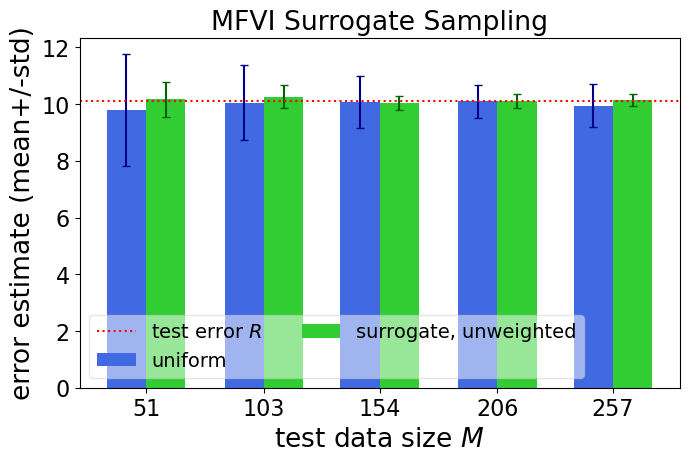

,Uniform R,Uniform Stddev,Nonuniform R,Nonuniform Stddev
51,9.781698,1.970958,10.164217,0.615757
103,10.049193,1.327333,10.266855,0.409768
154,10.081194,0.919203,10.048049,0.245457
206,10.093377,0.577758,10.101717,0.243506
257,9.948729,0.748135,10.140872,0.217509


Full Test R Value: 10.108405822165032


In [14]:
run_exp_weighted(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, n_reps = 30, model_type ="vi", num_exp = 30, plot_title = "MFVI")

---51---
17/17 [==============================] - 0s 972us/step
---103---
17/17 [==============================] - 0s 977us/step
---154---
17/17 [==============================] - 0s 973us/step
---206---
17/17 [==============================] - 0s 405us/step
---257---
17/17 [==============================] - 0s 981us/step


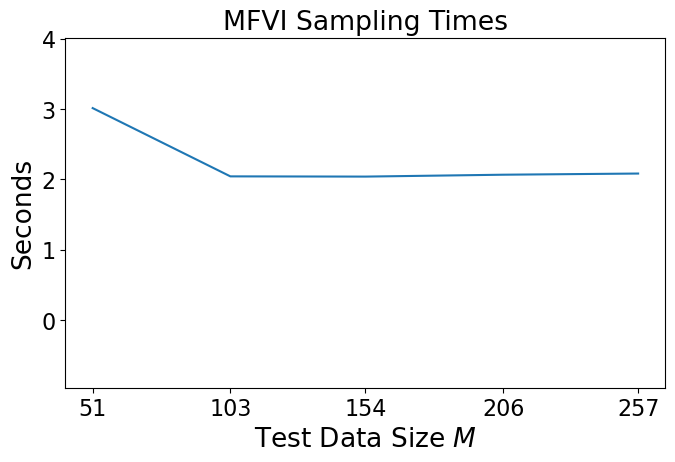

In [15]:
time_weight(X_train, y_train, X_test, y_test, y_pred, reg_evaluator, num_exp = 1, n_reps = 30, model_type = "vi", plot_title = "MFVI")